Model training!

In [2]:
import pandas as pd
import numpy as np
train = pd.read_csv('cleaned_train.csv')
train.head()

,PassengerId,Survived,SibSp,Parch,Fare,Cabin,is_male,norm_age,emb_s,emb_c,Pclass_1,Pclass_2
0,1,0,1,0,7.2500,NaN,1,0.271174,1,0,0,0
1,2,1,1,0,71.2833,C85,0,0.472229,0,1,1,0
2,3,1,0,0,7.9250,NaN,0,0.321438,1,0,0,0
3,4,1,1,0,53.1000,C123,0,0.434531,1,0,1,0
4,5,0,0,0,8.0500,NaN,1,0.434531,1,0,0,0


In [3]:
from fastai.tabular.all import (
    TabularDataLoaders, RandomSplitter,
    FillMissing, Categorify, Normalize, range_of, RegressionBlock
)
train['Survived'] = train['Survived'].astype(float)
train['Fare'] = train['Fare'].fillna(train['Fare'].median())
train['Fare_log'] = np.log1p(train['Fare'])

procs = [Categorify, FillMissing, Normalize]
path = '.'     
cat_names  = ['SibSp','Parch','is_male']
cont_names = ['Fare','norm_age','emb_s','emb_c','Pclass_1','Pclass_2']
splits = RandomSplitter(valid_pct=0.2, seed=42)

dls = TabularDataLoaders.from_df(
    procs=procs,
    df=train,
    path=".",
    cat_names=cat_names,
    cont_names=cont_names,
    y_names='Survived',
    y_block=RegressionBlock(),
    splits=splits
)

In [4]:
from fastai.tabular.all import MSELossFlat, rmse, mae, R2Score, tabular_learner

learn = tabular_learner(
    dls,
    loss_func=MSELossFlat(),
    metrics=[rmse, mae, R2Score()] 
)

In [5]:
from fastai.tabular.all import tabular_learner, accuracy

learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,_rmse,mae,r2_score,time
0,0.976784,0.400818,0.633102,0.459218,-0.619009,00:00
1,0.713986,0.298699,0.546534,0.441392,-0.206523,00:00
2,0.576238,0.267232,0.516945,0.450029,-0.079421,00:00
3,0.494860,0.247907,0.497903,0.386565,-0.001361,00:00
4,0.442424,0.267098,0.516815,0.408110,-0.078879,00:00
5,0.391972,0.267074,0.516792,0.389897,-0.078781,00:00
6,0.363191,0.272644,0.522153,0.388252,-0.101279,00:00
7,0.336725,0.278465,0.527697,0.391838,-0.124791,00:00


c:\Code\Local Code\titanic_survive\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Validation accuracy:  57.04%
Validation error rate: 42.96%


c:\Code\Local Code\titanic_survive\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


AttributeError: vocab

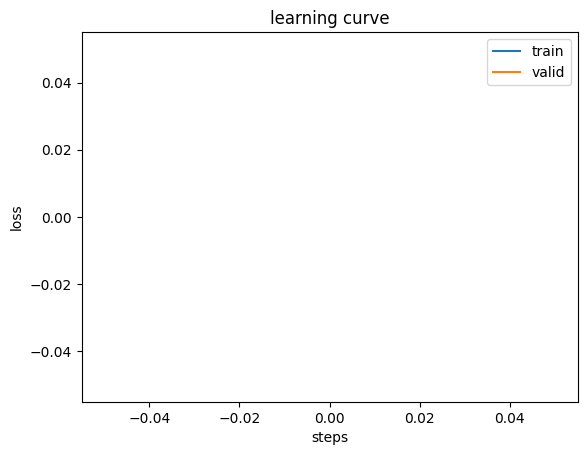

In [25]:
from fastai.tabular.all import ClassificationInterpretation

res = learn.validate()
valid_loss, accuracy = res[0], res[1]

print(f"Validation accuracy:  {accuracy*100:.2f}%")
print(f"Validation error rate: {(1-accuracy)*100:.2f}%")
learn.recorder.plot_loss()
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=100)